# ANALYSIS AND VISUALIZATION

#1. Load and prepare the data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/cleaned_superstore.csv', sep=';', encoding='latin1')

In [4]:
# Convert date columns
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [5]:
# Create shipping delay in days
df['Ship_Delay_Days'] = (df['Ship_Date'] - df['Order_Date']).dt.days

In [6]:
# Profit Margin Column
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

In [8]:
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Ship_Delay_Days,Profit_Margin
0,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,91,16.000000
1,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,91,30.000000
2,CA-2013-161389,2013-06-12,2013-11-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,...,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5920,153,32.499951
3,CA-2013-117590,2013-09-12,2013-11-12,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,...,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.540,7,0.2,123.4740,61,11.250068
4,CA-2013-117590,2013-09-12,2013-11-12,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,...,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630,61,-77.500000


In [9]:
df.describe()

,Order_Date,Ship_Date,Postal_Code,Sales,Quantity,Discount,Profit,Ship_Delay_Days,Profit_Margin
count,2570,2570,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000,2570.000000
mean,2013-01-31 09:38:48.093385216,2013-05-18 22:58:21.945525248,53501.471984,239.253614,3.765370,0.156385,32.656942,107.555253,11.930466
min,2011-01-02 00:00:00,2011-02-05 00:00:00,1040.000000,0.556000,1.000000,0.000000,-3839.990000,0.000000,-275.000000
25%,2012-03-09 00:00:00,2012-07-10 00:00:00,22153.000000,17.940000,2.000000,0.000000,1.773225,61.000000,7.000000
50%,2013-04-09 00:00:00,2013-08-01 00:00:00,49056.000000,59.360000,3.000000,0.200000,8.703400,122.000000,27.000000
75%,2014-03-06 00:00:00,2014-06-12 00:00:00,87401.000000,207.000000,5.000000,0.200000,31.198000,153.000000,36.249971
max,2014-12-12 00:00:00,2014-12-12 00:00:00,99207.000000,17499.900000,14.000000,0.800000,8399.980000,214.000000,50.000000
std,NaN,NaN,32006.172094,645.708266,2.194292,0.204031,249.668333,53.911677,46.913711


#2. Correlation Heatmap

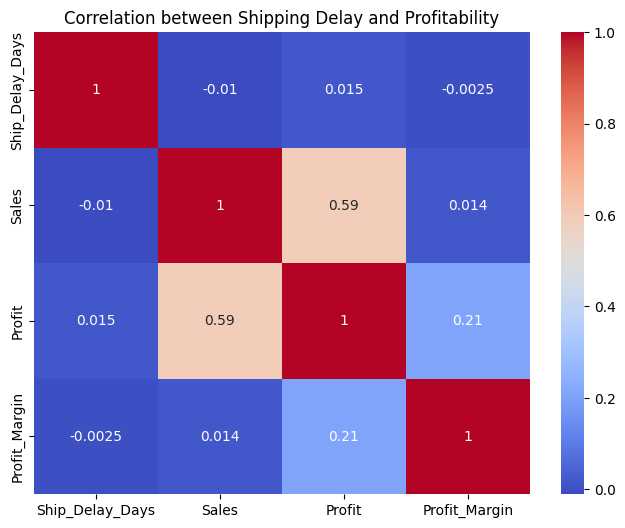

In [10]:
corr = df[['Ship_Delay_Days', 'Sales', 'Profit', 'Profit_Margin']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Shipping Delay and Profitability")
plt.show()

#3. Discount vs Profit

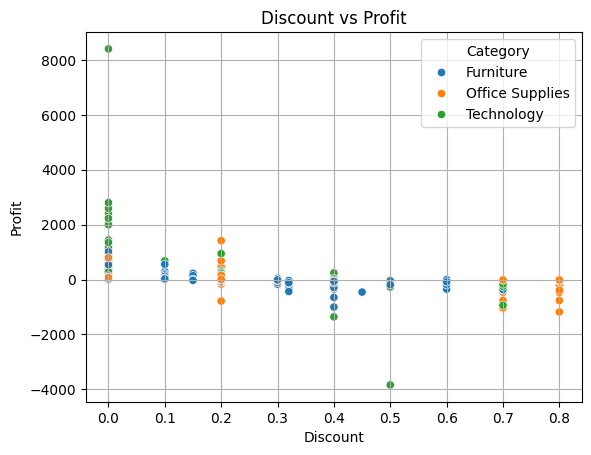

In [11]:
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

#4. Average Profit Margin by Category

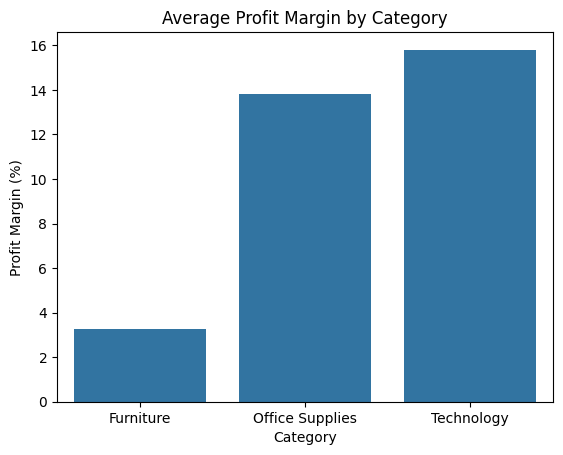

In [12]:
category_margin = df.groupby('Category')['Profit_Margin'].mean().reset_index()
sns.barplot(data=category_margin, x='Category', y='Profit_Margin')
plt.title("Average Profit Margin by Category")
plt.ylabel("Profit Margin (%)")
plt.show()

#5. Monthly Sales Trend

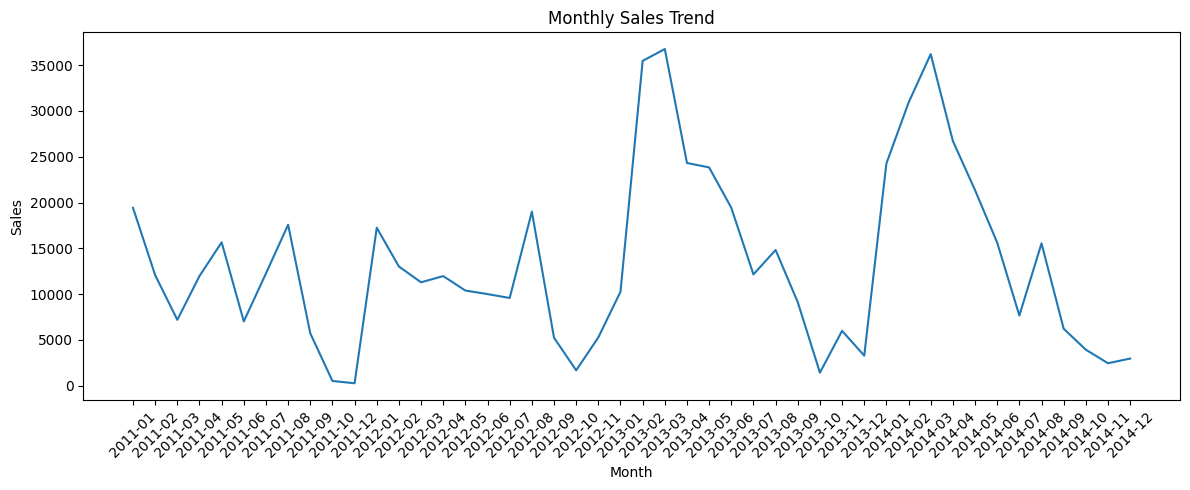

In [13]:
df['Month'] = df['Order_Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#6. Top 10 Loss-Making Products

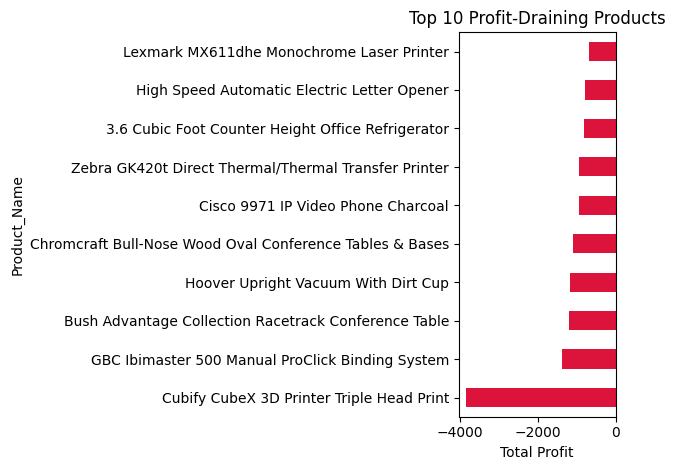

In [14]:
loss_products = df.groupby('Product_Name')['Profit'].sum().sort_values().head(10)
loss_products.plot(kind='barh', color='crimson')
plt.title("Top 10 Profit-Draining Products")
plt.xlabel("Total Profit")
plt.tight_layout()
plt.show()

In [15]:
# Save to new CSV
df.to_csv('/content/enhanced_superstore.csv', index=False)